First 5 rows of the dataset:
   Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
0           1        21.854305                       9   70.213332   
1           2        47.782144                       9  142.413614   
2           3        37.939727                       3  110.539985   
3           4        31.939632                       6  250.784939   
4           5        12.020839                       7  167.575159   

   Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
0          45.326394          8.804790              4        2400.287931  
1          47.900505          6.727632              6        3705.461312  
2          22.112484          8.208544              8        2653.631004  
3          26.267562          7.094515              4        2534.099466  
4          40.134306          6.160303              6        1741.179333  

Features selected by Lasso Regression:
Index(['Building_Height', 'Material_Quality_Index', 'Labor_C

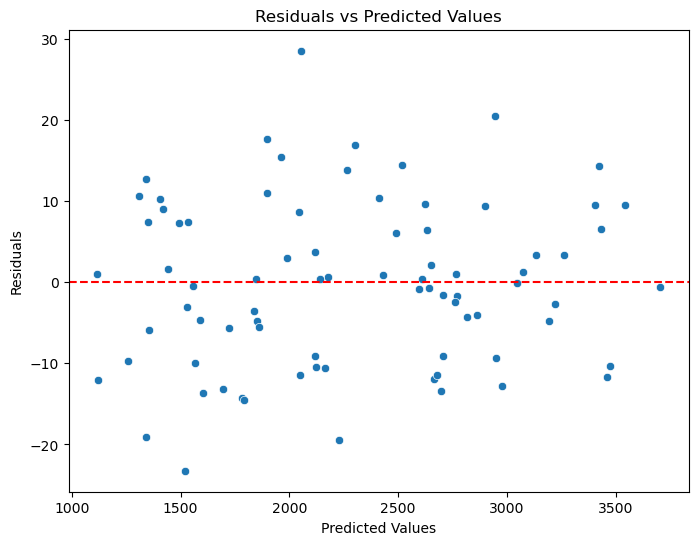

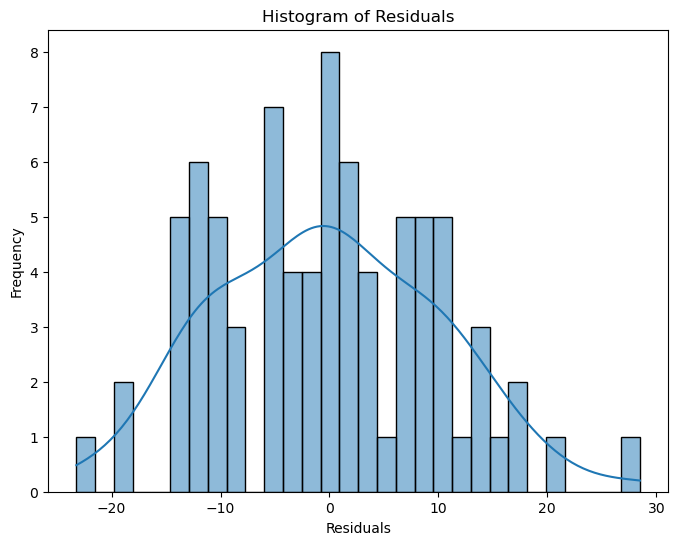


Outliers detected in the dataset (rows where Z-score > 3):
Empty DataFrame
Columns: [Building_Height, Material_Quality_Index, Labor_Cost, Concrete_Strength, Foundation_Depth]
Index: []

Model summary after removing outliers:
                            OLS Regression Results                            
Dep. Variable:      Construction_Cost   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.857e+04
Date:                Sat, 08 Feb 2025   Prob (F-statistic):          4.07e-134
Time:                        12:48:34   Log-Likelihood:                -297.86
No. Observations:                  80   AIC:                             607.7
Df Residuals:                      74   BIC:                             622.0
Df Model:                           5                                         
Covariance Type:            nonrobust                          

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from scipy.stats import zscore


df = pd.read_csv('Civil_Engineering_Regression_Dataset.csv')  # Adjust the path if necessary


print("First 5 rows of the dataset:")
print(df.head())


X = df[['Building_Height', 'Material_Quality_Index', 'Labor_Cost', 'Concrete_Strength', 'Foundation_Depth']]
y = df['Construction_Cost']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


lasso_model = LassoCV(cv=5) 
lasso_model.fit(X_train, y_train)


selected_features = X_train.columns[lasso_model.coef_ != 0]
print("\nFeatures selected by Lasso Regression:")
print(selected_features)


X_with_constant = sm.add_constant(X_train)  

ols_model = sm.OLS(y_train, X_with_constant).fit()


print("\nInitial model summary for backward elimination:")
print(ols_model.summary())


while max(ols_model.pvalues) > 0.05:
    excluded_variable = ols_model.pvalues.idxmax() 
    X_with_constant = X_with_constant.drop(columns=excluded_variable) 
    ols_model = sm.OLS(y_train, X_with_constant).fit() 
    print(f"\nExcluding variable {excluded_variable} as its p-value is {ols_model.pvalues.max()}")
    
print("\nFinal model after backward elimination:")
print(ols_model.summary())


y_pred = ols_model.predict(X_with_constant) 
residuals = y_train - y_pred 


plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


z_scores = np.abs(zscore(X_train)) 
outliers = (z_scores > 3).any(axis=1) 
outliers_data = X_train[outliers]

print(f"\nOutliers detected in the dataset (rows where Z-score > 3):")
print(outliers_data)


X_train_no_outliers = X_train[~outliers]
y_train_no_outliers = y_train[~outliers]


X_with_constant_no_outliers = sm.add_constant(X_train_no_outliers)
ols_model_no_outliers = sm.OLS(y_train_no_outliers, X_with_constant_no_outliers).fit()

print("\nModel summary after removing outliers:")
print(ols_model_no_outliers.summary())


print("\nModel Deployment Considerations:")
print("To enhance the accuracy of the construction cost estimation model, consider integrating real-time data sources such as:")
print("1. Material Price Trends")
print("2. Labor Availability and Rates")
print("3. Weather Forecasts")
print("4. Regulatory Changes")
print("5. Geospatial Data")
print("6. Historical Cost Data")


print("\nEthical Considerations & Decision Making:")
print("Errors in cost predictions can significantly impact construction projects in the following ways:")
print("1. Overestimating costs may lead to wastage and delays.")
print("2. Underestimating costs could result in financial strain, poor quality, or safety risks.")
print("3. Misestimated costs could lead to breaches of contract, safety hazards, and financial instability.")
